## Basic Data Wrangling

### Read data

In [15]:
%pylab inline
import json
path = '../../../pydata/ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

Populating the interactive namespace from numpy and matplotlib


### Analysis of timezone

In [4]:
# Top 10
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)


[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [5]:
# Top10

import pandas as pd
from collections import defaultdict
def get_counts(sequence):
    counts = defaultdict(int) # all value will be initilized as zero
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts(time_zones)
# convert dict to dataframe. then you can sort to get Top 10
counts_dt = pd.DataFrame(list(counts.items()), columns=['timezone','count'])
counts_dt.sort_values(by = 'count', ascending = False).head(10)

timezone  count
63     America/New_York   1251
0                          521
96      America/Chicago    400
41  America/Los_Angeles    382
93       America/Denver    191
31        Europe/London     74
68           Asia/Tokyo     37
77     Pacific/Honolulu     36
53        Europe/Madrid     35
88    America/Sao_Paulo     33

### Dataframe

In [8]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

frame = DataFrame(records)

### Cleaning

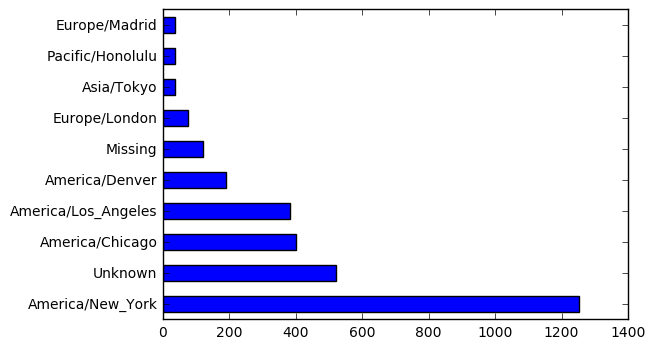

In [16]:
# quick count
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

# NA and blank
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()

tz_counts[:10].plot(kind='barh', rot=0)

### A Tag

In [10]:
results = Series([x.split()[0] for x in frame.a.dropna()])
# is wondows or not
cframe = frame[frame.a.notnull()]
# create array for grouping
ops_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
# so that ops_system can be used below for grouping
by_tz_os = cframe.groupby(['tz', ops_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

Not Windows  Windows
tz                                                  
                                      245.0    276.0
Africa/Cairo                            0.0      3.0
Africa/Casablanca                       0.0      1.0
Africa/Ceuta                            0.0      2.0
Africa/Johannesburg                     0.0      1.0
Africa/Lusaka                           0.0      1.0
America/Anchorage                       4.0      1.0
America/Argentina/Buenos_Aires          1.0      0.0
America/Argentina/Cordoba               0.0      1.0
America/Argentina/Mendoza               0.0      1.0

In [14]:
# aggregate on timezone only
indexer = agg_counts.sum(1).argsort()
indexer[:5]

# can be used to take entire pivot - awesome!
count_subset = agg_counts.take(indexer)[-10:]

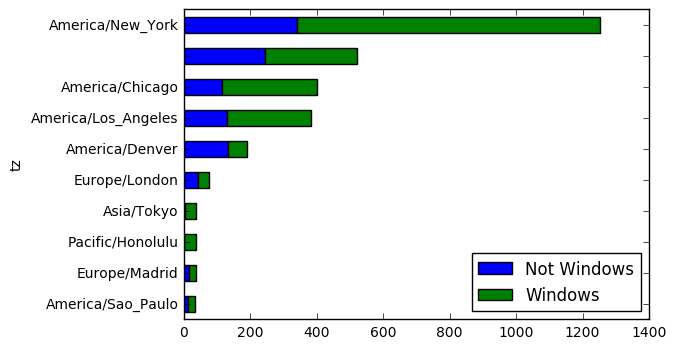

In [17]:
# plot
count_subset.plot(kind='barh', stacked=True)

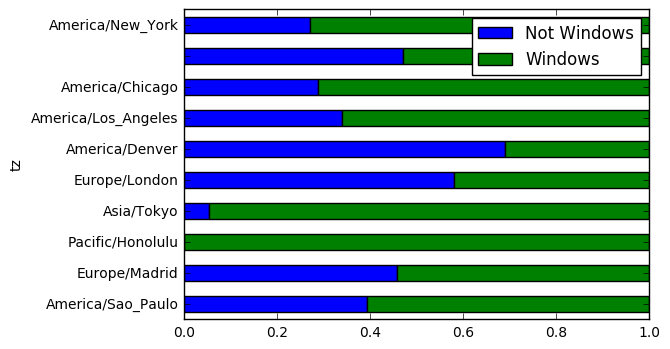

In [21]:
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind='barh', stacked=True)